<a href="https://colab.research.google.com/github/AbhimanyuAryan/BearClassification/blob/master/blackBear_TeddyClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from fastai import *
from fastai.vision import *

In [0]:
folder = 'black'
file = 'urls_black.txt'

In [0]:
folder = 'teddys'
file = 'urls_teddys.txt'

In [0]:
folder = 'grizzly'
file = 'urls_grizzly.txt'

Download images from Google

```js
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

and upload those file to Google 

In [0]:
path = Path('data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
path = Path('data/bears')
dest = path
dest.mkdir(parents=True, exist_ok=True)

In [15]:
!mv *.txt /content/data/bears

mv: cannot stat '*.txt': No such file or directory


In [15]:
path.ls()

[PosixPath('data/bears/urls_teddys.txt'),
 PosixPath('data/bears/cleaned.csv'),
 PosixPath('data/bears/grizzly'),
 PosixPath('data/bears/black'),
 PosixPath('data/bears/models'),
 PosixPath('data/bears/urls_black.txt'),
 PosixPath('data/bears/teddys'),
 PosixPath('data/bears/urls_grizzly.txt')]

In [13]:
download_images(path/file, dest, max_pics=200)

Error https://www.indianz.com/News/2017/06/30/yellowstonegrizzlycub.jpg ('Connection aborted.', OSError(0, 'Error'))


### Clearning images that can't open

In [0]:
classes = ['teddys', 'grizzly', 'black']

In [17]:
for c in classes:
  print(c)
  verify_images(path/c, delete=True, max_size=500)

teddys


grizzly


Image data/bears/grizzly/00000095.gif has 1 instead of 3 channels
black


### View data

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
                                 ds_tfms=get_transforms(), size=224, num_workers=4)

In [19]:
data.classes

['black', 'grizzly', 'teddys']

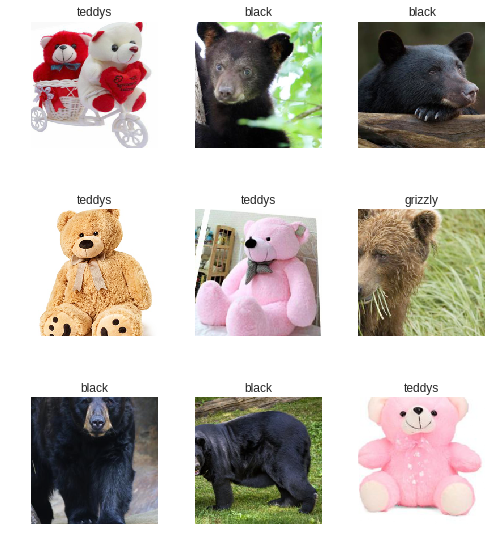

In [20]:
data.show_batch(rows=3, figsize=(7,8))

In [21]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'grizzly', 'teddys'], 3, 222, 55)

## Train model

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)


In [23]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.579309,0.515671,0.163636
2,0.944478,0.184556,0.054545
3,0.663846,0.148406,0.072727
4,0.510924,0.146619,0.072727


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [26]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.10E-06


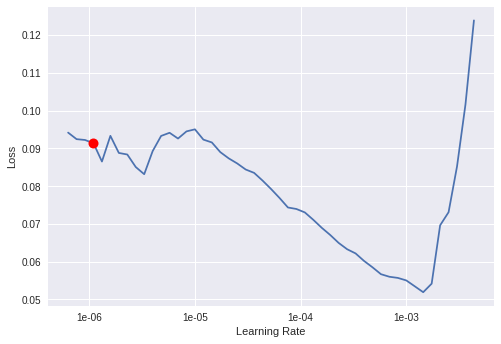

In [27]:
learn.recorder.plot()

In [28]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate
1,0.106174,0.144814,0.054545
2,0.076133,0.175397,0.054545


In [0]:
learn.save('stage-2')

### Interpretation

In [30]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (222 items)
x: ImageItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
grizzly,grizzly,grizzly,grizzly,grizzly
Path: data/bears;

Valid: LabelList (55 items)
x: ImageItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
grizzly,black,teddys,black,teddys
Path: data/bears;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=Tr

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

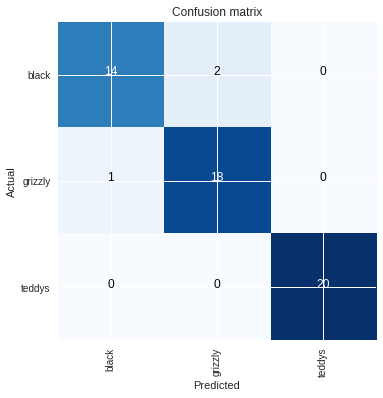

In [32]:
interp.plot_confusion_matrix()

## Cleaning Up

In [0]:
from fastai.widgets import *

ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

In [36]:
ds

LabelList (222 items)
x: ImageItemList
Image (3, 250, 300),Image (3, 250, 300),Image (3, 250, 300),Image (3, 250, 300),Image (3, 250, 300)
y: CategoryList
grizzly,grizzly,grizzly,grizzly,grizzly
Path: data/bears

In [39]:
path

PosixPath('data/bears')

Now we can pass in these paths to our widgets

In [0]:
ImageCleaner(ds, idxs, path)

## Putting model in production

In [0]:
learn.export()

In [0]:
??learn.export()

In [45]:
data.classes

['black', 'grizzly', 'teddys']

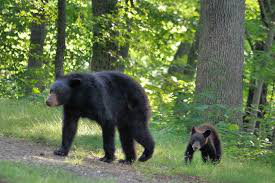

In [50]:
img = open_image(path/'pred.jpeg')
img

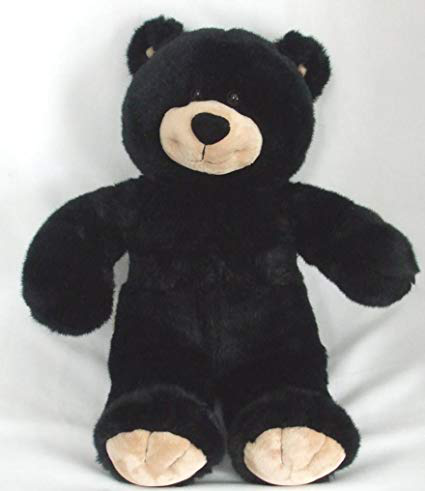

In [56]:
img2 = open_image(path/'pred_black_ted.jpg')
img2

In [57]:
pred_class,pred_idx, outputs = learn.predict(img)
pred_class

Category black

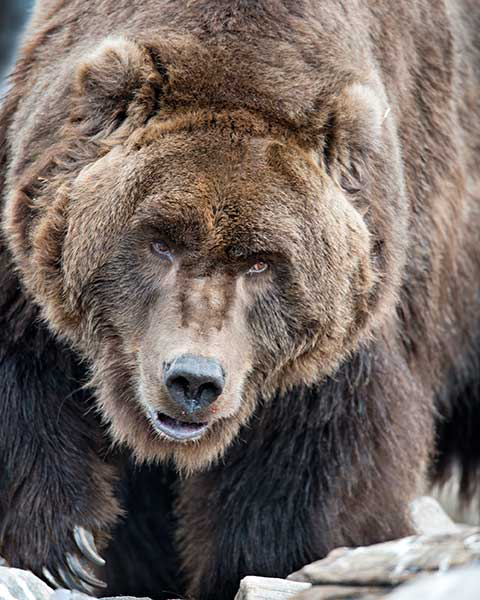

In [59]:
img = open_image(path/'pred_grizzly.jpg')
img

In [0]:
learn = load_learner(path)

In [60]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category grizzly